In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import listdir

dirs = [
#     '../Datasets/SAFeedback/2016/',
    '../Datasets/SAFeedback/2017/'
]
csvs = [directory + fileName
        for directory in dirs
        for fileName in listdir(directory)]

# dfs = [pd.read_csv(csv) for csv in csvs]
# df = pd.concat(dfs)

df = pd.DataFrame(pd.read_csv(csvs[0])).dropna()

df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right


In [20]:
# QUESTION: I'm wondering if students gave better ratings as the summer academy progressed.
# To answer this, I am going to display a scatter plot of ratings with respect to weeks.

In [21]:
# Firstly, remove the keyword 'week' from every week response:
df['Week'] = df['Week'].str.extract('(\d+)').astype(int)
# Secondly, convert ratings column into int:
df['Rating (Num)'] = df['Rating (Num)'].astype(int)

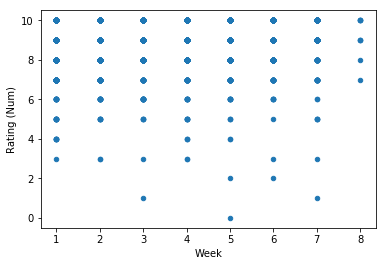

In [22]:
# Finally, our plot:
df.plot.scatter(x="Week", y="Rating (Num)")

In [23]:
# QUESTION: Did schedule pacing imoprive with time?
# We will draw another scatter plot to see.

In [25]:
# Firstly we'll need to quantify the responses in schedule pacing.

def quantify(resp):
    quantities = {
        'Way too slow': 1,
        'A little too slow': 2,
        'Just right': 3,
        'A little too fast': 4,
        'Way too fast': 5
    }
    return quantities[resp] if  resp in quantities else np.nan

df["Schedule Pacing"] = df["Schedule Pacing"].apply(quantify)

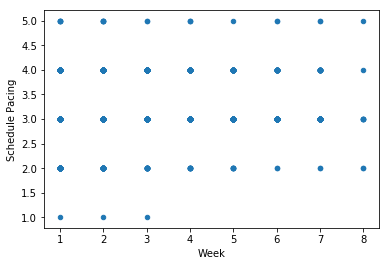

In [26]:
df.plot.scatter(x="Week", y="Schedule Pacing")

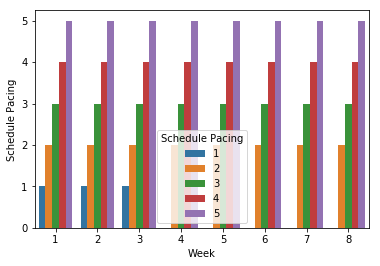

In [27]:
# Okay evidently a scatter plot is not the way to go in this scenario.
# Moving on to bar plot instead:
sns.barplot(x="Week", y="Schedule Pacing", hue="Schedule Pacing", data=df)

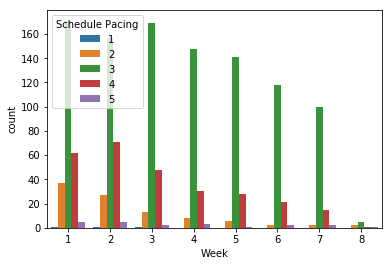

In [28]:
# Well that was a terrible idea. Countplot?
sns.countplot(x="Week", hue="Schedule Pacing", data=df)

In [29]:
# Not exactly what we were looking for, however this does answer a question we didn't think to ask.
# QUESTION: Did amount of feedback decrease over time?
# ANSWER: Yes.

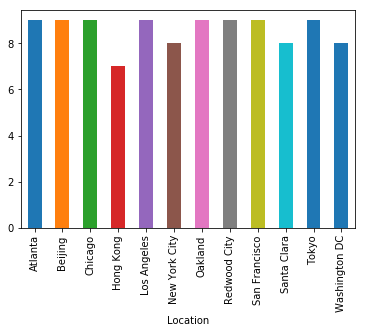

In [30]:
# QUESTION: Was the median rating across all locations simliar? 
# Or was one location better than most?

df.groupby("Location")["Rating (Num)"].median().plot(kind="bar")

In [31]:
# ANSWER: Hong Kong needs to up their game because people there are the least satisfied.

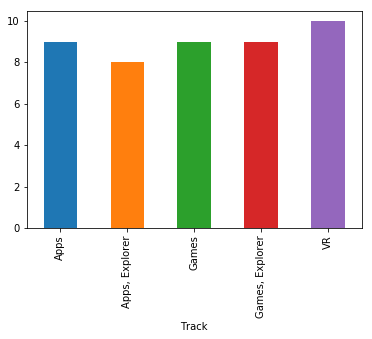

In [32]:
#QUESTION: Did track have any effect on satisfaction?

df.groupby('Track')["Rating (Num)"].median().plot(kind="bar")

In [33]:
#Answer: Apps, Explorers were the least satisfied while VR coders were the most satisfied.

In [34]:
#QUESTION: What is makeschool's most popular track?

In [35]:
df.Track.value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

In [139]:
# ANSWER: Apps track is four times more popular than any other track.